Khi xử lý dữ liệu, chúng ta thường nên bắt đầu từ những dữ liệu nhỏ trước, vì khi dữ liệu càng lớn thì quá trình xử lý đòi hỏi rất nhiều tài nguyên từ bộ nhớ máy tính đến thời gian xử lý dữ liệu. Đặc biệt là khi dữ liệu chúng ta chưa từng tiếp xúc với nó hoặc không thể nắm hết thông tin về nó, chúng ta sẽ phải trải nghiệm tìm hiểu về các đặc tính và ý nghĩa của các đặc tính đó trong dữ liệu. 

Trong thế giới thực, dữ liệu mà ta xử lý cũng có trường hợp ít, nhưng cũng có trường hợp dữ liệu rất nhiều. Nếu bạn không rút gọn những dữ liệu đó, bạn sẽ gặp rắc rối rất lớn về thời hạn mà công việc cho phép, có khi đến ngày deadline, bạn cũng chưa làm đâu vào đâu thì thực sự rất phiền phức. Do đó, một trong những vấn đề cơ bản cũng là rất quan trọng trong lĩnh vực `Data Science` đó là `preprocessing data`.

Ở bài này, bài viết sẽ hướng dẫn các bạn cách đẻ tách dữ liệu thành những dữ liệu nhỏ hơn để phục vụ cho việc trải nghiệm trước khi tiến hành những bước quan trọng về sau như xây dựng mô hình, cải thiện mô hình...

Bạn sẽ cần tải xuống dữ liệu từ link sau : 
https://www.kaggle.com/kmader/food41 

Đoạn code dưới đây thực hiện các nội dung bao gồm :
* Tập dữ liệu binary class (tách sushi/tacos thành train & test folders)
* 10% dữ liệu của Tập dữ liệu binary class  (tachs sushi/tacos thành train & test folders) 
* 10 class của tập dữ liệu (tách 10 classes thành train & test folders)
* 10% dữ liệu của 10 class dataset (lấy ngẫu nhiên 10% của training data, nhưng giũ nguyên test data )
* Tạo tất cả class của tập dữ liệu (tách tất cả classes thành train & test folders)
* 10% dữ liệu của tất cả các class (lấy ngẫu nhiên 10% của training data, giữ nguyên test data)


In [1]:
import os 
import sys
import shutil

In [2]:
!conda install --yes --prefix {sys.prefix} -c conda-forge tqdm

Solving environment: done

# All requested packages already installed.



In [3]:
!ls

data  images  Preprocessing_data.ipynb	tensorflow-deep-learning


* Cần 10% tập dữ liệu chỉ có 2 class (chỉ lấy train data)
* Cần 1% tập dữ liệu chỉ có 2 class
* Cần 10 tập dữ liệu
* Cần 10% class dataset
* Cần 1% class dataset
* Cần 10% của tất cả các tập dữ liệu

Kiểm tra xem folder hiện tại đang chứa file hay tập tin gì

In [5]:
!ls 

data  images  Preprocessing_data.ipynb	tensorflow-deep-learning


Khi tải file về bạn có thể giải nén bằng cách : `click chuột phải` -> `extract here`

Nếu muốn dùng code để giải nén thì bạn làm như sau:  

Nhưng trước khi giải nén, bạn cần lưu ý có 2 trường hợp có thể xảy ra : 
1. Người nén file đã đưa tất cả các file vào trong 1 folder thì lúc này bạn giải nén sẽ chỉ xuất hiện 1 folder duy nhất trông rất gọn gàng.
2. Người nén file chưa gom tất cả các file vào trong 1 folder, lúc này nếu không để ý mà giải nén vội vàng sẽ tạo rất nhiều file rất lộn xộn dẫn đến khó kiểm soát, nhất là khi folder đó của bạn trước đó chứa rất nhiều file sẵn có rồi.

Do đó, tốt nhất bạn nên tạo một folder chứa file zip này rồi hãy giải nén. 

* Kiểm tra và tạo folder có tên data
* Có thể sử dụng `mkdir data` hoặc sử dụng thư viện `os` trong python để tạo folder

In [6]:
if os.path.isdir("data") : 
    print("Data has already been existing")
else : 
    os.mkdir("data")
    print("Creating data folder successfully")


Data has already been existing


Sau đó, di chuyển file nén vào trong folder data mới được tạo

In [7]:
# Sử dụng lệnh của terminal 
# mv archive.zip data # mv là lệnh chuyển file, archive.zip là tên file cần được chuyển, data chình là folder đích đến

In [8]:
# Sử dụng lệnh trong python
if os.path.isfile("archive.zip") : # Nếu file vẫn còn tồn tại trong folder hiện tại thì mới tiến hành dời file
    shutil.move("archive.zip","data")
    print("Move successfully")
else : 
    print("File not found.")

File not found.


In [9]:
# Lúc này, folder data đã chứa file nén
!ls data

food_c101_n1000_r384x384x3.h5	    food_test_c101_n1000_r32x32x1.h5
food_c101_n10099_r32x32x1.h5	    food_test_c101_n1000_r32x32x3.h5
food_c101_n10099_r32x32x3.h5	    food_test_c101_n1000_r64x64x1.h5
food_c101_n10099_r64x64x1.h5	    food_test_c101_n1000_r64x64x3.h5
food_c101_n10099_r64x64x3.h5	    images
food_test_c101_n1000_r128x128x1.h5  meta
food_test_c101_n1000_r128x128x3.h5


Tiến hành giải nén file zip

In [10]:
import zipfile

Kiểm tra folder hiện tại

In [11]:
# tạo hàm để kiểm tra vì có thể sử dụng sau này
def get_current_dirname() : 
    """
    return current dirname working
    """
    os.getcwd() # get current working directory
    current_dirname = os.getcwd().split("/")[-1]
    return current_dirname

get_current_dirname()

'deep-learning'

Nếu Folder hiện tại là `data` thì bỏ qua nếu không thì bạn cần thay đổi folder làm việc hiện tại

In [12]:
if get_current_dirname() != "data" : 
    os.chdir("data")

In [13]:
get_current_dirname()

'data'

OK, đã đúng với folder làm việc hiện tại. Bây giờ, ta sẽ tiến hành giải nén file, nhưng bạn nên tạo function để nếu có thể ta sẽ tái sử dụng tránh lặp đi lặp lại code quá nhiều lần.

In [15]:
def unzip_file(filename) : 
    if os.path.isfile(filename) :
        zipref = zipfile.ZipFile(filename, "r")
        zipref.extractall()
        # Sau khi giải nén thì remove file zip 
        os.remove(filename)
        print("Extracted all and remove zip file!")
unzip_file("archive.zip")    

Sau khi giải nén, folder data hiện tại đã có các file sau : 

In [16]:
os.listdir()

['food_c101_n10099_r64x64x3.h5',
 'food_test_c101_n1000_r64x64x1.h5',
 'food_c101_n10099_r64x64x1.h5',
 'images',
 'meta',
 'food_test_c101_n1000_r128x128x3.h5',
 'food_test_c101_n1000_r32x32x1.h5',
 'food_c101_n10099_r32x32x3.h5',
 'food_test_c101_n1000_r64x64x3.h5',
 'food_c101_n10099_r32x32x1.h5',
 'food_test_c101_n1000_r32x32x3.h5',
 'food_c101_n1000_r384x384x3.h5',
 'food_test_c101_n1000_r128x128x1.h5']

Kiểm tra folder `images`

In [17]:
if os.path.isdir("images") : 
    os.chdir("images")
get_current_dirname()    

'images'

In [18]:
!ls

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

**Trước khi tiến hành các bước dưới đây, chúng ta cần thay đổi folder làm việc hiện tại sao cho folder này chứa notebook này**

In [19]:
os.chdir("../..")


In [20]:
!ls

data  images  Preprocessing_data.ipynb	tensorflow-deep-learning


In [21]:
import json
from tqdm.notebook import tqdm

# Lấy labels ( trong JSON )

In [131]:
def get_labels_json(label_path) : 
    """
    chấp nhận một đường dẫn label (ở dạng JSON) và trả về file như một Python Objects
    """
    with open(label_path) as fs : 
        return json.load(fs)
train_labels = get_labels("data/meta/meta/train.json")
test_labels = get_labels("data/meta/meta/test.json")

In [56]:
def get_labels_txt(label_path) : 
    """
    chấp nhận một đường dẫn label (ở dạng txt) và trả về file như một Python Objects
    """
    with open(label_path) as fs : 
        return list(fs.read().split("\n"))

In [23]:
len(train_labels), len(test_labels)

(101, 101)

Số label trong `train` và `test` đều là 101

Tạo danh sách các label 

In [24]:
labels = []
for key, values in train_labels.items() : 
    labels.append(key)
str(labels)

"['churros', 'hot_and_sour_soup', 'samosa', 'sashimi', 'pork_chop', 'spring_rolls', 'panna_cotta', 'beef_tartare', 'greek_salad', 'foie_gras', 'tacos', 'pad_thai', 'poutine', 'ramen', 'pulled_pork_sandwich', 'bibimbap', 'beignets', 'apple_pie', 'crab_cakes', 'risotto', 'paella', 'steak', 'baby_back_ribs', 'miso_soup', 'frozen_yogurt', 'club_sandwich', 'carrot_cake', 'falafel', 'bread_pudding', 'chicken_wings', 'gnocchi', 'caprese_salad', 'creme_brulee', 'escargots', 'chocolate_cake', 'tiramisu', 'spaghetti_bolognese', 'mussels', 'scallops', 'baklava', 'edamame', 'macaroni_and_cheese', 'pancakes', 'garlic_bread', 'beet_salad', 'onion_rings', 'red_velvet_cake', 'grilled_salmon', 'chicken_curry', 'deviled_eggs', 'caesar_salad', 'hummus', 'fish_and_chips', 'lasagna', 'peking_duck', 'guacamole', 'strawberry_shortcake', 'clam_chowder', 'croque_madame', 'french_onion_soup', 'beef_carpaccio', 'fried_rice', 'donuts', 'gyoza', 'ravioli', 'fried_calamari', 'spaghetti_carbonara', 'french_toast', '

Ở mỗi class nên có 750 hình ảnh train, 250 hình test

In [25]:
print(len(train_labels["hot_and_sour_soup"]))
print(len(test_labels["hot_and_sour_soup"]))

750
250


## Tạo folder cho target class và dời hình đến đó

In [267]:
def copy_images(parent_folder, subset_folder, dataset, target_labels) : 
    """
    Sao chép các tất cả các file có tên folder nằm trong list `target labels` đến `parent_folder/subset_folder/dataset` 
    
    VD : Sao chép hình ảnh từ đến `data/pizza_subset/train/` & `data/apple_pie/train`
    Tham số : 
    --------
    parent_folder (str) : Đường dẫn liên kết của Folder gốc chứa tất cả data
    subset_folder (str) : Đường dẫn để sao chép đến
    dataset (str) : Tập dữ liệu (train hoặc test)
    target_labels (list) : Danh sách tên của các folder muốn copy    
    """
    # Lấy danh sách labels có sẵn 
    labels = get_labels_json(f"data/meta/meta/{dataset}.json")  
    for label in target_labels : 
        # Tạo folder mới trong subset folder (folder copy)
        os.makedirs(f"{subset_folder}/{dataset}/{label}", exist_ok=True)       
        # Trước khi lặp hình ảnh, tạo list images_copied để lưu lại các image đã copied
        images_copied = [] 
        
        #Dùng vòng lặp để đi qua từng file image để sao chép đến subset folder          
        for image_path in labels[label] :             
            #Tạo đường dẫn file gốc 
            og_path = f"{parent_folder}/{image_path}.jpg"
            # Tạo đường dẫn đến folder subset
            new_path = f"{subset_folder}/{dataset}/{image_path}.jpg"

            # Sử dụng thư viện shutil trong python để tiến hành copy
            shutil.copy(og_path, new_path)
            # Lưu trư image 
            images_copied.append(image_path)
        print(f"Đã sao chép {len(images_copied)} hình ảnh đến tập dữ liệu {dataset}. Đường dẫn liên kết : {subset_folder}/{dataset}/{label}")

## Tạo hàm lấy hình ảnh mẫu ngẫu nhiên

In [140]:
import random
import path
def get_images_randomly(target_dir, new_dir, sample_amount = 0.1, random_state = 42) : 
    """
    Lấy một lượng mẫu hình ảnh ngẫu nhiên từ target_dir, sau đó sao chép vào new_dir
    
    VD: target_dir = data/images/apple_pie, new_dir= data/new_dir_name/train/apple_pie/X_percent_of_all_files        
    Tham số
    -----------
    target_dir (str) : Đường dẫn liên kết đến Folder chứa tất cả hình ảnh của class mà bạn muốn lấy .
    new_dir (str) : Đường dẫn liên kết đến Folder chuẩn bị chứa một lượng mẫu hình ảnh được sao chép từ target_dir.
    sample_amount (float) : mặc định 0.1 (tương đương 10% trong tổng số file của class đó) - tỉ lệ số file ảnh được copy
    random_state (int) : giá trị random seed
    """    
    random.seed(random_state)
    # Lấy danh sách các các tệp hình ảnh trong target_dir
    images = [{dir_name : os.listdir(os.path.join(target_dir, dir_name))} for dir_name in os.listdir(target_dir)]
    for image in images : 
        for label, values in image.items() : 
                print(f"Đang xử lý {label}")
                sample_number = int(sample_amount * len(values))
                print(f"Thư mục {label} có tất cả {len(values)} file ảnh. Lấy ngẫu nhiên {sample_number} (tương đương {int(sample_amount * 100)}%) số mẫu ")
                random_images = random.sample(values, k=sample_number)
                # Tạo đường dẫn đến thư mục cần sao chép
                new_target_dir = f"{new_dir}/{label}"
                os.makedirs(new_target_dir,exist_ok=True)
                images_copied = []
                for img in random_images : 
                    # Đường dẫn gốc đến file ảnh                     
                    og_path = f"{target_dir}/{label}/{img}"
                    # Đường dẫn mới của file ảnh
                    new_path = f"{new_target_dir}/{img}"
                    # Copy từ đường dẫn gốc đến đường dẫn mới
                    shutil.copy(og_path, new_path)
                    images_copied.append(img)
                print(f"Đã sao chép {len(images_copied)} file ảnh từ {target_dir} đến {new_target_dir}")
                
                # Chắc chắn số hình ảnh được copy là chính xác
                assert len(os.listdir(new_target_dir)) == sample_number
                assert len(images_copied) == sample_number
    
get_images_randomly("data/images", "data/new_data", sample_amount=0.2)

Đang xử lý waffles
Thư mục waffles có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/waffles
Đang xử lý greek_salad
Thư mục greek_salad có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/greek_salad
Đang xử lý ravioli
Thư mục ravioli có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/ravioli
Đang xử lý club_sandwich
Thư mục club_sandwich có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/club_sandwich
Đang xử lý croque_madame
Thư mục croque_madame có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/croque_madame
Đang xử lý macaroni_and_cheese
Thư mục macaroni_and_cheese có tất cả 1000 file ảnh. Lấy ngẫu nhiê

Đã sao chép 200 file ảnh từ data/images đến data/new_data/french_toast
Đang xử lý risotto
Thư mục risotto có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/risotto
Đang xử lý lobster_roll_sandwich
Thư mục lobster_roll_sandwich có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/lobster_roll_sandwich
Đang xử lý strawberry_shortcake
Thư mục strawberry_shortcake có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/strawberry_shortcake
Đang xử lý lobster_bisque
Thư mục lobster_bisque có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/lobster_bisque
Đang xử lý pork_chop
Thư mục pork_chop có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/i

Đã sao chép 200 file ảnh từ data/images đến data/new_data/chicken_wings
Đang xử lý hummus
Thư mục hummus có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/hummus
Đang xử lý eggs_benedict
Thư mục eggs_benedict có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/eggs_benedict
Đang xử lý creme_brulee
Thư mục creme_brulee có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/creme_brulee
Đang xử lý cannoli
Thư mục cannoli có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/cannoli
Đang xử lý escargots
Thư mục escargots có tất cả 1000 file ảnh. Lấy ngẫu nhiên 200 (tương đương 20%) số mẫu 
Đã sao chép 200 file ảnh từ data/images đến data/new_data/escargots
Đang xử lý breakfast_burrito
Thư mục 

# Tạo 2 dữ liệu ( VD : sushi, tacos)

In [269]:
parent_folder = "data/images"
subset_folder = "data/sushi_tacos"
datasets = ["train", "test"]
target_labels = ["sushi", "tacos"]

for dataset in datasets : 
    copy_images(parent_folder, subset_folder, dataset, target_labels)

Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/sushi_tacos/train/sushi
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/sushi_tacos/train/tacos
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/sushi_tacos/test/sushi
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/sushi_tacos/test/tacos


In [148]:
print(f"Số lượng hình ảnh trainning của sushi : {len(os.listdir('data/sushi_tacos/train/sushi'))}")
print(f"Số lượng hình ảnh test sushi : {len(os.listdir('data/sushi_tacos/test/sushi'))}")

Số lượng hình ảnh trainning của sushi : 750
Số lượng hình ảnh test sushi : 250


In [159]:
# Đảm bảo không có sự trùng lặp trong các tập huấn luyện và kiểm tra
# Lấy filenames từ bộ train / test của mỗi class và đảm bảo đầu ra bằng 0
sushi_train_filenames = set(os.listdir("data/sushi_tacos/train/sushi/"))
sushi_test_filenames = set(os.listdir("data/sushi_tacos/test/tacos/"))

# Chắc chắn rằng khi intersect (phép giao) giữa 2 set này sẽ phải rỗng
if len(sushi_train_filenames.intersection(sushi_test_filenames)) == 0 : 
    print("OK")
else : 
    print("Trong set train hoặc set test có chứa filenames của set kia")

OK


In [160]:
# Đảm bảo không có sự trùng lặp trong các tập huấn luyện và kiểm tra
# Lấy filenames từ bộ train / test của mỗi class và đảm bảo đầu ra bằng 0
sushi_train_filenames = set(os.listdir("data/sushi_tacos/train/sushi/"))
sushi_test_filenames = set(os.listdir("data/sushi_tacos/test/tacos/"))

# Chắc chắn rằng khi intersect (phép giao) giữa 2 set này sẽ phải rỗng
if len(sushi_train_filenames.intersection(sushi_test_filenames)) == 0 : 
    print("OK")
else : 
    print("Trong set train hoặc set test có chứa filenames của set kia")

OK


## Tạo 10% cho 2 lớp dữ liệu (binary class dataset)

In [161]:
!ls data/sushi_tacos/

test  train


In [164]:
# Tạo 10% dữ liệu cho tập dữ liệu của 2 class sushi và tacos được tạo sẵn  ở thư mục đã tạo phía trên (chỉ cho trainning)
target_dir_10_percent = "data/sushi_tacos/train"
new_dir_10_percent = "data/sushi_tacos_10_percent/train"

get_images_randomly(target_dir_10_percent, new_dir_10_percent,)

Đang xử lý tacos
Thư mục tacos có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/sushi_tacos/train đến data/sushi_tacos_10_percent/train/tacos
Đang xử lý sushi
Thư mục sushi có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/sushi_tacos/train đến data/sushi_tacos_10_percent/train/sushi


In [169]:
# Tạo 1% dữ liệu cho tập dữ liệu của 
target_dir_1_percent = "data/sushi_tacos/train"
new_dir_1_percent = "data/sushi_tacos_1_percent/train"


get_images_randomly(target_dir_1_percent, new_dir_1_percent, sample_amount=0.01)

Đang xử lý tacos
Thư mục tacos có tất cả 750 file ảnh. Lấy ngẫu nhiên 7 (tương đương 1%) số mẫu 
Đã sao chép 7 file ảnh từ data/sushi_tacos/train đến data/sushi_tacos_1_percent/train/tacos
Đang xử lý sushi
Thư mục sushi có tất cả 750 file ảnh. Lấy ngẫu nhiên 7 (tương đương 1%) số mẫu 
Đã sao chép 7 file ảnh từ data/sushi_tacos/train đến data/sushi_tacos_1_percent/train/sushi


## Quan sát hình ảnh

In [170]:
import matplotlib.pyplot as plt

Tạo function để quan sát hình ảnh ngẫu nhiên. Trong python có khá nhiều thư viện để đọc file hình ảnh thành matrix như `pillow` , `openCV`, hoặc từ `matplotlib`

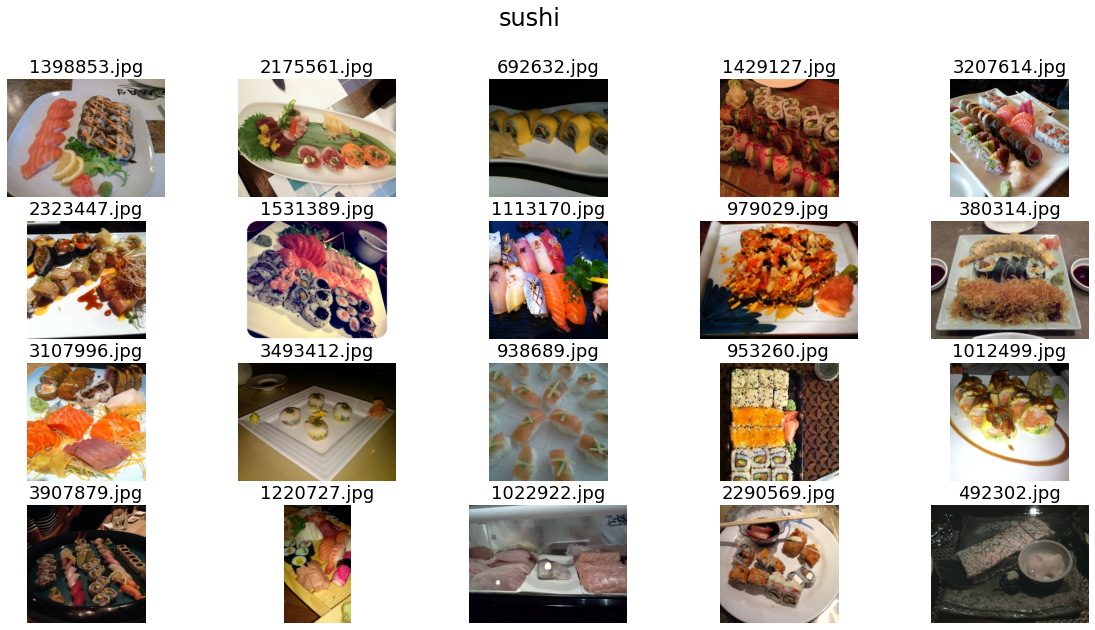

In [236]:
import math
import cv2

def view_random_images(target_dir,target_class, num_files=10, num_cols=3) : 
    """
    Tạo hình ảnh ngẫu nhiên từ `target_dir/target_class` 
    Tham số : 
    -----------
    target_dir (str) : Đường dẫn thư mục chứa class
    target_class (str) : Tên class
    num_files (int) : Số hình cần hiển thị min = 1, max = 20
    num_cols (int) : Số hình trên 1 cột
    """
    if num_files > 20 or num_files < 1 :
        return 
    if num_cols > 5 or num_cols < 1: 
        num_cols = 3
        
    target_path = f"{target_dir}/{target_class}"
    if os.path.isdir(target_path) : 
        image_names = os.listdir(target_path)
        random_images = random.sample(image_names, k=num_files)    
        
        num_rows = math.ceil(num_files / num_cols)
        plt.figure(figsize=(20,10))
        for i, image_name in enumerate(random_images) :             
            image_path = f"{target_path}/{image_name}"
            # ==============================================
            # Sử dung opencv để mở file hình ảnh dưới dạng matrix
            img = cv2.imread(image_path)
            # Vì cv2 đọc file ảnh dưới dang BGR color channel nên cần chuyển về RGB color Channel
            img = img[:,:,::-1]
            img = cv2.resize(img, dsize=(228,228), interpolation=cv2.INTER_AREA)
            # ==============================================
            # Sử dụng matplotlib
            img = plt.imread(image_path)
            # ==============================================
            plt.subplot(num_rows, num_cols, i+1)            
            plt.imshow(img)
            plt.title(image_name, fontsize=18)
            plt.axis(False)
            plt.suptitle(target_class, fontsize=24)
    else : 
        print("đường dẫn không chính xác")
        return 
    
view_random_images("data/sushi_tacos/train", "sushi",num_files=20,num_cols=5)

## Tạo 10 class tập dữ liệu 

Lựa chọn 10 class và tạo folder với 10 tập dữ liệu này.

In [196]:
!ls data/meta/meta/

classes.txt  labels.txt  test.json  test.txt  train.json  train.txt


In [204]:
classes = []
with open("data/meta/meta/classes.txt") as fs : 
    class_names = fs.read()
    class_names = class_names.split("\n")
    ten_classes = random.sample(class_names, k=10)
    print(ten_classes)
    

['spring_rolls', 'panna_cotta', 'lobster_bisque', 'donuts', 'waffles', 'gyoza', 'clam_chowder', 'cannoli', 'risotto', 'hot_dog']


Tạo ngẫu nhiên 10 class thành công. Bây giờ ta sẽ tiến hành tạo folder cho 10 tập này

In [270]:
parent_folder = "data/images"
subset_folder = "data/10_food_classes"
datasets = ["train", "test"]
for dataset in datasets :        
        copy_images(parent_folder,subset_folder, dataset,target_labels=ten_classes)

Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/10_food_classes/train/spring_rolls
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/10_food_classes/train/panna_cotta
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/10_food_classes/train/lobster_bisque
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/10_food_classes/train/donuts
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/10_food_classes/train/waffles
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/10_food_classes/train/gyoza
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/10_food_classes/train/clam_chowder
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/10_food_classes/train/cannoli
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/10_food_classes/train/risotto
Đã sao chép 750 hình ảnh đến tập dữ liệu train

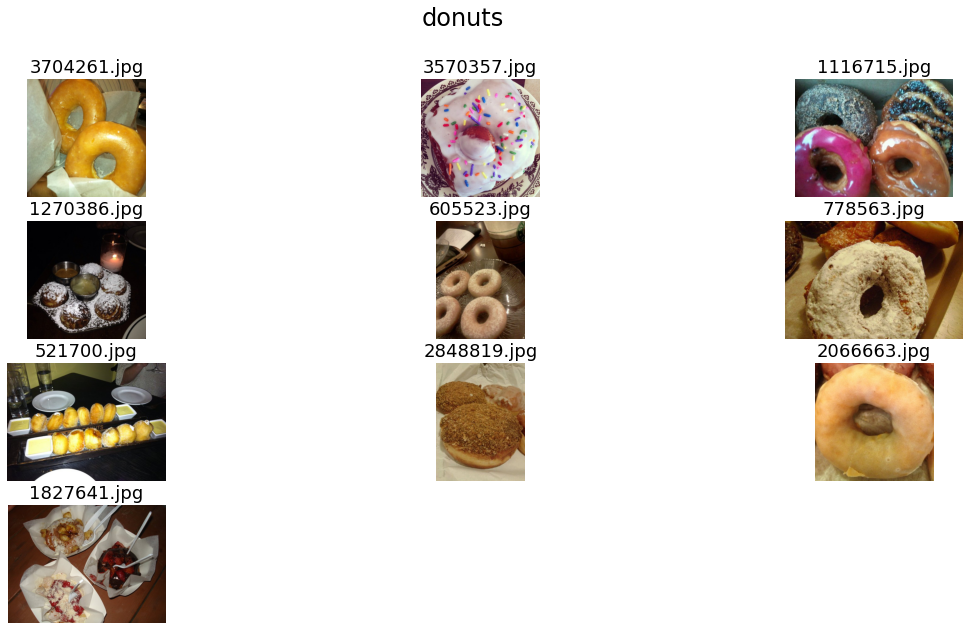

In [240]:
view_random_images("data/10_food_classes/train",ten_classes[3])

In [242]:
# Tạo 10% dữ liệu trong 10_food_classes (chỉ lấy trainning data)
get_images_randomly("data/10_food_classes/train", "data/10_food_classes_10_percent/train", sample_amount=0.1)

Đang xử lý waffles
Thư mục waffles có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/10_food_classes/train đến data/10_food_classes_10_percent/train/waffles
Đang xử lý gyoza
Thư mục gyoza có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/10_food_classes/train đến data/10_food_classes_10_percent/train/gyoza
Đang xử lý spring_rolls
Thư mục spring_rolls có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/10_food_classes/train đến data/10_food_classes_10_percent/train/spring_rolls
Đang xử lý hot_dog
Thư mục hot_dog có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/10_food_classes/train đến data/10_food_classes_10_percent/train/hot_dog
Đang xử lý risotto
Thư mục risotto có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/10_food_classes/train đến da

In [244]:
# Tạo 1% dữ liệu trong 10_food_classes (chỉ lấy trainning data)
get_images_randomly("data/10_food_classes/train", "data/10_food_classes_1_percent/train", sample_amount=0.01)

Đang xử lý waffles
Thư mục waffles có tất cả 750 file ảnh. Lấy ngẫu nhiên 7 (tương đương 1%) số mẫu 
Đã sao chép 7 file ảnh từ data/10_food_classes/train đến data/10_food_classes_1_percent/train/waffles
Đang xử lý gyoza
Thư mục gyoza có tất cả 750 file ảnh. Lấy ngẫu nhiên 7 (tương đương 1%) số mẫu 
Đã sao chép 7 file ảnh từ data/10_food_classes/train đến data/10_food_classes_1_percent/train/gyoza
Đang xử lý spring_rolls
Thư mục spring_rolls có tất cả 750 file ảnh. Lấy ngẫu nhiên 7 (tương đương 1%) số mẫu 
Đã sao chép 7 file ảnh từ data/10_food_classes/train đến data/10_food_classes_1_percent/train/spring_rolls
Đang xử lý hot_dog
Thư mục hot_dog có tất cả 750 file ảnh. Lấy ngẫu nhiên 7 (tương đương 1%) số mẫu 
Đã sao chép 7 file ảnh từ data/10_food_classes/train đến data/10_food_classes_1_percent/train/hot_dog
Đang xử lý risotto
Thư mục risotto có tất cả 750 file ảnh. Lấy ngẫu nhiên 7 (tương đương 1%) số mẫu 
Đã sao chép 7 file ảnh từ data/10_food_classes/train đến data/10_food_classes_

In [247]:
# Sao chép thư mục 10 classes test vào thư muc 10 classes percentage
ten_percent_test = "data/10_food_classes/test/"
shutil.copytree(ten_percent_test, "data/10_food_classes_10_percent/test")
shutil.copytree(ten_percent_test, "data/10_food_classes_1_percent/test")

'data/10_food_classes_1_percent/test'

## Tách toàn bộ tập dữ liệu  thành train và test

In [276]:
class_names = list(filter(lambda x : x, class_names))
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [277]:
parent_folder = "data/images"
subset_folder = "data/all_food_classes"
datasets=["train","test"]

for dataset in data_sets : 
    copy_images(parent_folder, subset_folder, dataset, class_names)

Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/apple_pie
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/baby_back_ribs
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/baklava
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/beef_carpaccio
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/beef_tartare
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/beet_salad
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/beignets
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/bibimbap
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/bread_pudding
Đã sao chép 750 hình ản

Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/pizza
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/pork_chop
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/poutine
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/prime_rib
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/pulled_pork_sandwich
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/ramen
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/ravioli
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/red_velvet_cake
Đã sao chép 750 hình ảnh đến tập dữ liệu train. Đường dẫn liên kết : data/all_food_classes/train/risotto
Đã sao chép 750 hình ảnh đến tập d

Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/all_food_classes/test/hamburger
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/all_food_classes/test/hot_and_sour_soup
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/all_food_classes/test/hot_dog
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/all_food_classes/test/huevos_rancheros
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/all_food_classes/test/hummus
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/all_food_classes/test/ice_cream
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/all_food_classes/test/lasagna
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/all_food_classes/test/lobster_bisque
Đã sao chép 250 hình ảnh đến tập dữ liệu test. Đường dẫn liên kết : data/all_food_classes/test/lobster_roll_sandwich
Đã sao chép 250 hình ảnh đến t

In [281]:
# Tạo 10% data cho all_food_class (Chỉ lấy train data)
get_images_randomly("data/all_food_classes/train/", "data/all_food_classes_10_percent/train")

Đang xử lý waffles
Thư mục waffles có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/waffles
Đang xử lý greek_salad
Thư mục greek_salad có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/greek_salad
Đang xử lý ravioli
Thư mục ravioli có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/ravioli
Đang xử lý club_sandwich
Thư mục club_sandwich có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/club_sandwich
Đang xử lý croque_madame
Thư mục croque_madame có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 

Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/spaghetti_carbonara
Đang xử lý hot_and_sour_soup
Thư mục hot_and_sour_soup có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/hot_and_sour_soup
Đang xử lý hot_dog
Thư mục hot_dog có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/hot_dog
Đang xử lý carrot_cake
Thư mục carrot_cake có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/carrot_cake
Đang xử lý falafel
Thư mục falafel có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/falafel

Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/baby_back_ribs
Đang xử lý cheese_plate
Thư mục cheese_plate có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/cheese_plate
Đang xử lý grilled_salmon
Thư mục grilled_salmon có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/grilled_salmon
Đang xử lý spaghetti_bolognese
Thư mục spaghetti_bolognese có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_10_percent/train/spaghetti_bolognese
Đang xử lý nachos
Thư mục nachos có tất cả 750 file ảnh. Lấy ngẫu nhiên 75 (tương đương 10%) số mẫu 
Đã sao chép 75 file ảnh từ data/all_food_classes/train/ đến data/all_food_classes_1

In [282]:
# Sao chép toàn bộ folder test vào tất cả các folder rút gọn
ten_percent_test = "data/all_food_classes/test/"
shutil.copytree(ten_percent_test, "data/all_food_classes_10_percent/test")

'data/all_food_classes_10_percent/test'